In [35]:
import pandas as pd

In [36]:
df = pd.read_csv(r'C:/MBAN/Data science/Assignment 1/sales_data.csv')

In [37]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [38]:
# First part is to do data cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [40]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [41]:
# find the outliers
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

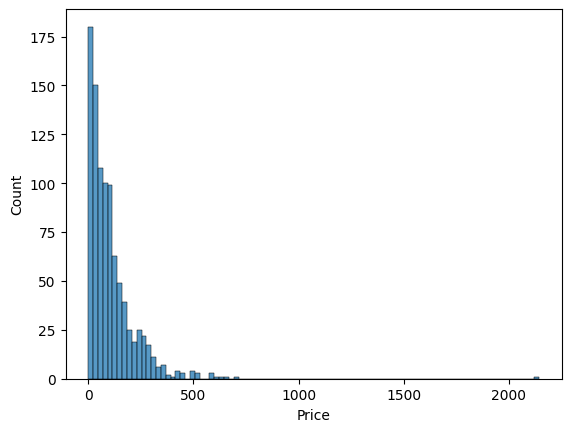

In [42]:
sns.histplot(df['Price'])

<Axes: xlabel='Units Sold', ylabel='Count'>

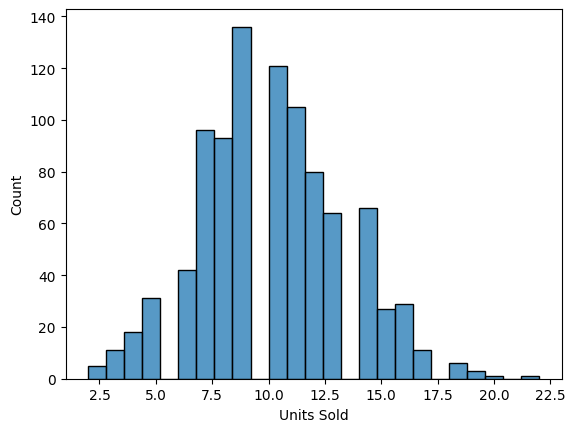

In [43]:
sns.histplot(df['Units Sold'])

In [44]:
#find the outlier
df[df['Price'] > 2000]


,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [45]:
#drop the outlier
df.drop(969, axis=0, inplace = True)

<Axes: xlabel='Price', ylabel='Count'>

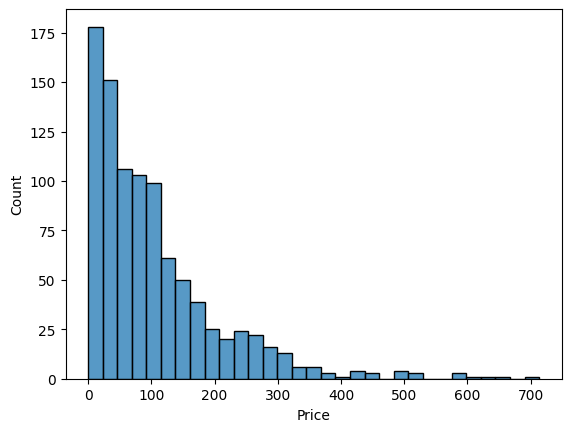

In [46]:
sns.histplot(df['Price'])

In [47]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [48]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,899,899,899.000000,899.000000,999
unique,50,10,NaN,NaN,999
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,104,NaN,NaN,1
mean,NaN,NaN,104.189399,10.073415,NaN
std,NaN,NaN,103.550942,3.163537,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.280000,8.000000,NaN
50%,NaN,NaN,76.010000,10.000000,NaN
75%,NaN,NaN,142.055000,12.000000,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     899 non-null    object 
 1   Region      899 non-null    object 
 2   Price       899 non-null    float64
 3   Units Sold  899 non-null    float64
 4   Sale Date   999 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.8+ KB


In [50]:
# calculate how big is the missing data
df_missing_count = df.isnull().sum()

In [51]:
df_missing_value = df_missing_count.sum()

In [52]:
df_total_value =df.shape[0]*(df.shape[1]-1)

In [53]:
df_missing_ratio = df_missing_value/df_total_value
df_missing_ratio = df_missing_ratio * 100
df_missing_ratio

10.01001001001001

In [54]:
# the missing data is just over 10% of the total data, for prodcut code, Region fill in other
df['Product'] = df['Product'].fillna('Other')
df['Region'] = df['Region'].fillna('Other')


In [55]:
# the missing price and unit sold can be impulated by taking the mean of the prices of products sold and units of products sold
df['Price'] = df['Price'].fillna(df['Price'].mean()) 
#ideally taking the mean of the price of the same product sold in the same region is more reasonable
df['Units Sold'] = df['Units Sold'].fillna(int(df['Units Sold'].mean())) 
# The data is normal distribution. Taking mean to imputate the missing value. Ideally taking the mean of the unit sold of the same product in the same region is more reasonable. 

In [56]:
# double check if any missing value
df_missing_count = df.isnull().sum()
df_missing_count

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64

In [57]:
# Second part is the data processing and analyzing to draw conclusions and recommendations


In [58]:
# Add one more column to display the revenue amount
df_price = df["Price"]
df_unitsold=df["Units Sold"]
df_revenue = df_price * df_unitsold
df["Revenue"] = df_revenue
df

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Other,Region_6,75.96,10.0,2022-01-01,759.60
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
995,Other,Region_7,31.83,13.0,2024-09-22,413.79
996,Product_36,Other,46.19,9.0,2024-09-23,415.71
997,Other,Region_7,311.80,13.0,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


In [59]:
# Price variance of the same product in different regions over the time
import numpy as np
table = pd.pivot_table(df, values=['Price'], index=['Product'],
                       aggfunc={'Price': [min, max, np.median, np.ptp]})
table = table.sort_values(by=table.columns[-1], ascending = False)
table

Price                           
               max      median    min     ptp
Product                                      
Product_41  713.29  104.189399  10.98  702.31
Product_31  665.00   84.810000   5.29  659.71
Product_26  623.60   92.084700   0.20  623.40
Product_7   605.87   99.320000   7.35  598.52
Product_45  580.60   78.690000   3.08  577.52
Product_14  517.29  104.210000   5.13  512.16
Product_15  510.06   64.260000   3.60  506.46
Product_35  511.74  104.189399   6.26  505.48
Product_34  496.61   94.760000   1.39  495.22
Other       487.81  100.775000   0.58  487.23
Product_22  493.20   89.020000  20.32  472.88
Product_29  460.20   94.800000   1.38  458.82
Product_50  447.75   86.730000   1.36  446.39
Product_16  433.17   59.235000   0.96  432.21
Product_40  426.02  111.980000   3.48  422.54
Product_17  420.47   69.510000   5.76  414.71
Product_48  418.24   65.245000   7.13  411.11
Product_32  390.63   82.095000   2.16  388.47
Product_30  385.96  131.540000   2.39  383.57
Product_19  368.16   85.525000   7.78  360.38
Product_23  362.00   94.100000   4.14  357.86
Product_2   347.20  102.290000   2.14  345.06
Product_8   352.86   73.180000  17.22  335.64
Product_49  329.37  144.400000   9.39  319.98
Product_39  318.96   78.630000   0.37  318.59
Product_37  315.48   89.280000   6.49  308.99
Product_6   299.38   60.410000   6.74  292.64
Product_10  291.53   49.800000   0.33  291.20
Product_24  287.65  103.109700   0.22  287.43
Product_27  273.87   54.775000   0.61  273.26
Product_46  273.74   96.720000   5.81  267.93
Product_9   264.05   55.170000   0.31  263.74
Product_20  275.37  135.180000  12.25  263.12
Product_47  286.46   79.470000  24.24  262.22
Product_5   264.72   47.620000   3.56  261.16
Product_1   268.73   75.365000  10.15  258.58
Product_38  259.52   46.630000   1.29  258.23
Product_44  251.53  103.514700   6.93  244.60
Product_12  249.05  100.930000   7.60  241.45
Product_21  257.41   62.500000  16.54  240.87
Product_42  240.97   72.430000   4.59  236.38
Product_25  245.19  102.430000  10.65  234.54
Product_13  233.62   93.940000   0.61  233.01
Product_36  234.01   46.190000   4.87  229.14
Product_28  242.26   63.170000  17.13  225.13
Product_33  202.95   90.010000   1.09  201.86
Product_3   201.54   27.620000   0.54  201.00
Product_4   199.61   92.400000   2.52  197.09
Product_43  175.84   68.530000   2.41  173.43
Product_18  181.22   58.305000  12.35  168.87
Product_11  169.51   69.820000   8.93  160.58

In [60]:
# Price flucation of the same product in the same regions over the time
import numpy as np
table = pd.pivot_table(df, values=['Price'], index=['Product', 'Region'],
                       aggfunc={'Price': [min, max, np.median, np.ptp]})
table = table.sort_values(by=table.columns[-1], ascending= False)
table

Price                         
                        max   median     min     ptp
Product    Region                                   
Product_31 Region_3  665.00   23.730    5.29  659.71
Product_7  Other     605.87   81.795   42.16  563.71
Product_14 Region_7  517.29   82.420    5.13  512.16
Product_26 Region_2  623.60  373.435  123.27  500.33
Product_31 Region_4  505.01   84.810    6.47  498.54
...                     ...      ...     ...     ...
           Region_6   14.20   14.200   14.20    0.00
Product_32 Region_2   70.22   70.220   70.22    0.00
           Region_8    2.16    2.160    2.16    0.00
           Region_9   27.86   27.860   27.86    0.00
Product_9  Region_9    2.49    2.490    2.49    0.00

[455 rows x 4 columns]

In [61]:
# Find the top 10 sales revenue
df_best_performer = df.sort_values(by='Revenue',ascending=False).head(10)
df_best_performer


,Product,Region,Price,Units Sold,Sale Date,Revenue
437,Product_26,Region_8,585.17,13.0,2023-03-14,7607.21
814,Product_26,Region_2,623.60,12.0,2024-03-25,7483.20
853,Product_41,Region_1,713.29,10.0,2024-05-03,7132.90
119,Product_35,Other,401.31,16.0,2022-04-30,6420.96
789,Product_7,Other,605.87,10.0,2024-02-29,6058.70
728,Product_31,Region_3,665.00,9.0,2023-12-30,5985.00
276,Product_48,Region_8,418.24,14.0,2022-10-04,5855.36
684,Product_45,Region_8,580.60,10.0,2023-11-16,5806.00
275,Product_16,Region_4,433.17,13.0,2022-10-03,5631.21
526,Product_31,Region_4,505.01,11.0,2023-06-11,5555.11


In [62]:
# Find the worest sales revenue
df_worst_performer = df.sort_values(by='Revenue',ascending=True).head(10)
df_worst_performer

,Product,Region,Price,Units Sold,Sale Date,Revenue
397,Product_10,Region_9,0.33,3.0,2023-02-02,0.99
201,Product_24,Region_4,0.22,10.0,2022-07-21,2.20
347,Product_9,Region_5,0.31,9.0,2022-12-14,2.79
456,Product_26,Region_4,0.20,14.0,2023-04-02,2.80
486,Other,Region_2,0.58,8.0,2023-05-02,4.64
132,Product_39,Region_5,0.37,13.0,2022-05-13,4.81
703,Product_27,Region_8,0.61,10.0,2023-12-05,6.10
53,Product_3,Region_6,0.54,14.0,2022-02-23,7.56
465,Other,Region_6,1.43,6.0,2023-04-11,8.58
505,Product_16,Region_1,0.96,11.0,2023-05-21,10.56


In [63]:
# Find the top sellers
df_best_seller = df.sort_values(by='Units Sold',ascending=False).head(10)
df_best_seller

,Product,Region,Price,Units Sold,Sale Date,Revenue
719,Product_50,Region_4,86.730000,22.0,2023-12-21,1908.060000
221,Product_5,Region_5,50.360000,20.0,2022-08-10,1007.200000
912,Product_22,Region_8,104.189399,19.0,2024-07-01,1979.598587
232,Product_14,Region_3,104.270000,19.0,2022-08-21,1981.130000
962,Product_13,Region_7,0.610000,19.0,2024-08-20,11.590000
390,Product_41,Region_3,104.189399,18.0,2023-01-26,1875.409188
568,Product_42,Region_1,9.720000,18.0,2023-07-23,174.960000
167,Product_28,Region_6,104.189399,18.0,2022-06-17,1875.409188
796,Product_16,Region_2,272.830000,18.0,2024-03-07,4910.940000
678,Product_9,Region_3,104.189399,18.0,2023-11-10,1875.409188


In [64]:
# Find the top sellers
df_worst_seller = df.sort_values(by='Units Sold',ascending=True).head(10)
df_worst_seller

,Product,Region,Price,Units Sold,Sale Date,Revenue
581,Product_5,Region_2,115.58,2.0,2023-08-05,231.16
876,Product_6,Region_1,15.33,2.0,2024-05-26,30.66
315,Product_5,Region_3,264.72,2.0,2022-11-12,529.44
237,Product_13,Region_5,129.81,2.0,2022-08-26,259.62
844,Product_41,Region_3,139.33,2.0,2024-04-24,278.66
246,Other,Region_2,223.00,3.0,2022-09-04,669.00
474,Product_23,Other,173.06,3.0,2023-04-20,519.18
447,Product_3,Region_3,15.05,3.0,2023-03-24,45.15
706,Other,Region_3,255.40,3.0,2023-12-08,766.20
124,Product_37,Region_5,100.65,3.0,2022-05-05,301.95


<Axes: xlabel='Product', ylabel='Region'>

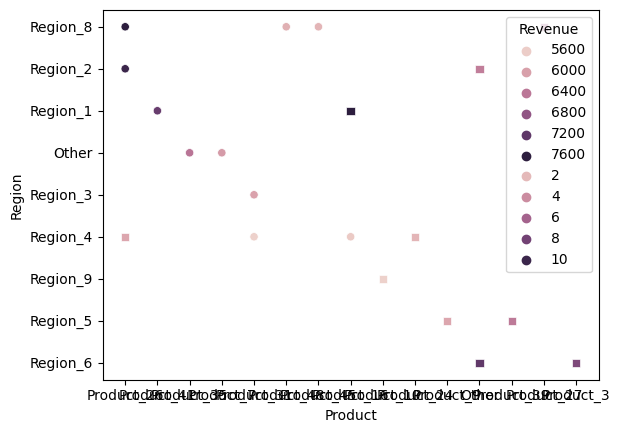

In [65]:
# Concludion drawn
# The prices of the same product in different locations varies. The price discrepancy of Product_41 in different locations can be as large as 70 times
# Price flucation of the same product in the same regions over the time. The prices of Product_31 in Region_3 soared most by more than 15 times over the time
# Above list reveals the top 10 best performers and the 10 worst performers. Below scatterplot illustrates the top and worst performers.
# The top 10 sellers are also demonstrated by Units Sold
import seaborn as sns
sns.scatterplot(x = "Product",
                y = "Region",
                hue = "Revenue",
                data = df_best_performer)

sns.scatterplot(x = "Product",
                y = "Region",
                hue = "Revenue",
                marker = "s",
                data = df_worst_performer)

In [66]:
# Recommendations
# More resource allocations on the top 10 performers with more products launch and promotions
# Conduct marketing research on the best sellers products and worst seller products to understand the market demand and trend for product line strategy like streamlined product lines, consolidated distribution and removed non-value added products
# Investigate the pricing strategy of the prodcuts with large price discrepancies in various locations if overpriced or underpriced?
# Investigate the cause for the worst 10 performers if underpriced or unappropriate selling/marketing strategy